<h2 style="color:purple">Exercise 2</h2>
<ol>
        <li>
            Download the <strong>Pima Indians Diabetes Dataset</strong> from the link below:<br>
            🔗 <a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database" target="_blank">
            https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database</a>
        </li>
        <li>Perform <strong>exploratory data analysis (EDA)</strong> to understand the distribution of features and identify any strong indicators of diabetes.</li>
        <li>
            Visualize the relationship between selected features (like <em>glucose</em>, <em>age</em>, <em>BMI</em>) and the outcome using appropriate <strong>bar charts or boxplots</strong>.
        </li>
        <li>
            Build a <strong>Logistic Regression model</strong> to predict the <code>Outcome</code> (whether a person has diabetes or not).
        </li>
        <li>
            Evaluate the performance of your model using appropriate metrics such as:
            <ul>
                <li>Accuracy</li>
                <li>Confusion Matrix</li>
                <li>Classification Report</li>
            </ul>
        </li>
    </ol>


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.drop('Pregnancies', axis=1, inplace=True)

In [5]:
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


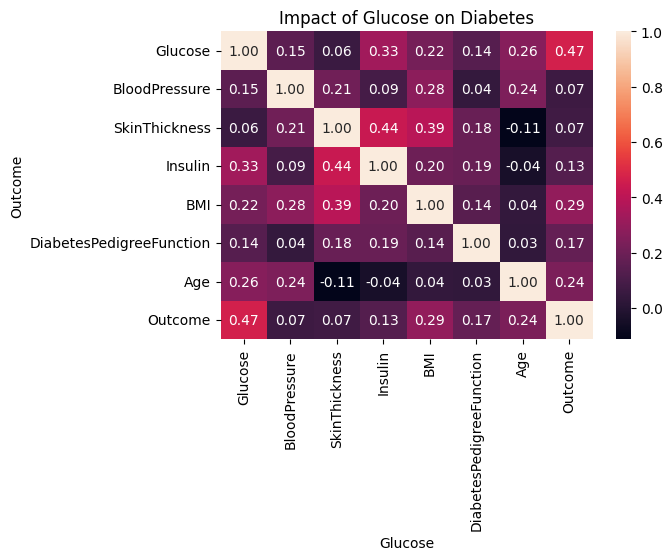

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), fmt=".2f", annot=True)
plt.title('Impact of Glucose on Diabetes')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

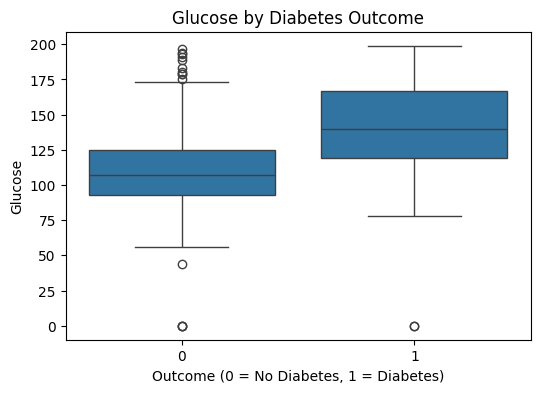

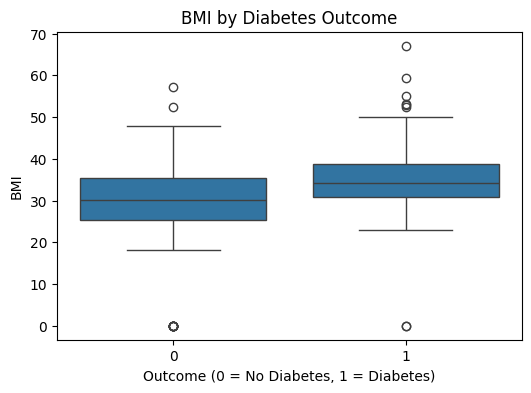

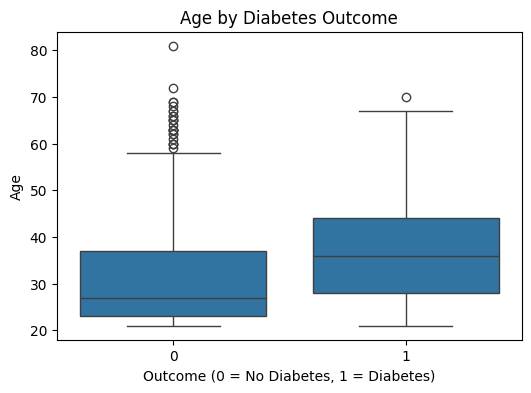

In [8]:
for feature in ['Glucose', 'BMI', 'Age']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} by Diabetes Outcome')
    plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
    plt.show()

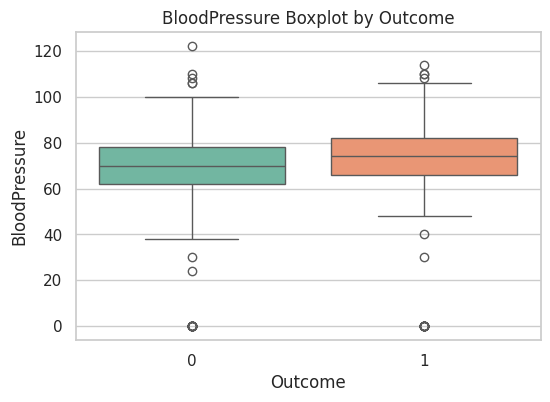

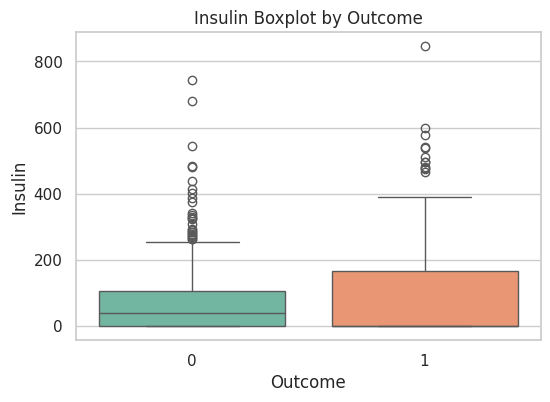

In [9]:
# Set style
sns.set(style="whitegrid")

# Bar charts for average values grouped by outcome
features = ['BloodPressure', 'Insulin']

# Boxplots for visualizing distribution
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=feature, data=df, palette="Set2", hue='Outcome', legend=False)
    plt.title(f"{feature} Boxplot by Outcome")
    plt.xlabel("Outcome")
    plt.ylabel(feature)
    plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
y_predicted = model.predict(X_test)

In [13]:
model.score(X_test,y_test)

0.7662337662337663

In [14]:
model.coef_, model.intercept_

(array([[ 0.03408627, -0.0134271 ,  0.00369319, -0.00193396,  0.10213034,
          0.62456086,  0.04656596]]),
 array([-9.08212404]))

In [20]:
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)
y_pred_df = pd.DataFrame(y_predicted, columns=['y_predicted'])

# Combine X_test, y_test, and predictions
final_df = pd.concat([X_test.reset_index(drop=True),
                      y_test_df,
                      y_pred_df],
                     axis=1)
final_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,y_predicted
0,98,58,33,190,34.0,0.430,43,0,0
1,112,75,32,0,35.7,0.148,21,0,0
2,108,64,0,0,30.8,0.158,21,0,0
3,107,80,0,0,24.6,0.856,34,0,0
4,136,90,0,0,29.9,0.210,50,0,0


In [16]:
final_df.tail()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,y_predicted
149,165,88,0,0,30.4,0.302,49,1,1
150,77,56,30,56,33.3,1.251,24,0,0
151,95,72,0,0,36.8,0.485,57,0,0
152,146,70,38,360,28.0,0.337,29,1,0
153,74,70,40,49,35.3,0.705,39,0,0


In [17]:
correct_count = (y_test_df.iloc[:, 0] == y_pred_df['y_predicted']).sum()
incorrect_count = (y_test_df.iloc[:, 0] != y_pred_df['y_predicted']).sum()

print("Correct predictions:", correct_count)
print("Incorrect predictions:", incorrect_count)

Correct predictions: 118
Incorrect predictions: 36


In [18]:
# 1. Accuracy
acc = accuracy_score(y_test, y_predicted)
print(f"Accuracy: {acc:.4f}\n")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
print("Confusion Matrix:")
print(cm, "\n")

# 3. Classification Report
report = classification_report(y_test, y_predicted)
print("Classification Report:")
print(report)

Accuracy: 0.7662

Confusion Matrix:
[[82 17]
 [19 36]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

